# Hands-on Lab: Explore Embeddings

## Goal
Visualize word similarity using pretrained Word2Vec embeddings

## Tools
- **gensim**: For loading pretrained Word2Vec models
- **sklearn**: For dimensionality reduction and similarity calculations
- **matplotlib**: For visualization

## Learning Objectives
By the end of this lab, you will be able to:
1. Load and work with pretrained Word2Vec embeddings
2. Find nearest neighbors in vector space
3. Visualize word similarities using 2D plots
4. Analyze business-relevant vocabulary through embeddings

## Step 1: Import Required Libraries

First, let's import all the necessary libraries for our embedding exploration.

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP and embeddings
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# Machine learning
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Gensim version: {gensim.__version__}")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!
Gensim version: 4.3.3


## Step 2: Load Pretrained Word2Vec Model

We'll use Google's pretrained Word2Vec model trained on Google News dataset. This model contains 300-dimensional vectors for 3 million words and phrases.

**Note**: If you don't have the model downloaded, we'll provide instructions to download it or use an alternative approach.

In [2]:
# Try to load Google's pretrained Word2Vec model
try:
    # Path to Google's Word2Vec model (you may need to download this)
    model_path = 'GoogleNews-vectors-negative300.bin'
    word_vectors = KeyedVectors.load_word2vec_format(model_path, binary=True)
    print("✅ Successfully loaded Google News Word2Vec model")
    print(f"Vocabulary size: {len(word_vectors.key_to_index):,}")
    print(f"Vector dimensions: {word_vectors.vector_size}")
    
except FileNotFoundError:
    print("❌ Google News model not found. Let's use gensim's downloader...")
    print("This will download a smaller model for demonstration purposes.")
    
    # Alternative: Use gensim's API to download a smaller model
    import gensim.downloader as api
    
    # Download word2vec-google-news-300 (smaller version)
    print("Downloading word2vec-google-news-300 model...")
    word_vectors = api.load('word2vec-google-news-300')
    print("✅ Successfully loaded Word2Vec model from gensim API")
    print(f"Vocabulary size: {len(word_vectors.key_to_index):,}")
    print(f"Vector dimensions: {word_vectors.vector_size}")

❌ Google News model not found. Let's use gensim's downloader...
This will download a smaller model for demonstration purposes.
[==================================================] 100.0% 1662.8/1662.8MB downloaded
✅ Successfully loaded Word2Vec model from gensim API
Vocabulary size: 3,000,000
Vector dimensions: 300


## Step 3: Define Business-Relevant Words

Let's select a set of business-relevant words to explore their embeddings and relationships.

In [3]:
# Define business-relevant words for analysis
business_words = [
    # Finance & Economics
    'profit', 'revenue', 'investment', 'budget', 'finance', 'economy',
    
    # Technology & Innovation
    'technology', 'innovation', 'digital', 'software', 'artificial_intelligence', 'data',
    
    # Marketing & Sales
    'marketing', 'sales', 'customer', 'brand', 'advertising', 'promotion',
    
    # Operations & Management
    'management', 'leadership', 'strategy', 'operations', 'efficiency', 'quality',
    
    # Human Resources
    'employee', 'talent', 'training', 'performance', 'recruitment', 'teamwork'
]

# Filter words that exist in our vocabulary
available_words = [word for word in business_words if word in word_vectors.key_to_index]
missing_words = [word for word in business_words if word not in word_vectors.key_to_index]

print(f"✅ Available words ({len(available_words)}): {available_words}")
print(f"❌ Missing words ({len(missing_words)}): {missing_words}")

# Use available words for our analysis
target_words = available_words[:15]  # Limit to first 15 for better visualization
print(f"\n🎯 Words selected for analysis: {target_words}")

✅ Available words (30): ['profit', 'revenue', 'investment', 'budget', 'finance', 'economy', 'technology', 'innovation', 'digital', 'software', 'artificial_intelligence', 'data', 'marketing', 'sales', 'customer', 'brand', 'advertising', 'promotion', 'management', 'leadership', 'strategy', 'operations', 'efficiency', 'quality', 'employee', 'talent', 'training', 'performance', 'recruitment', 'teamwork']
❌ Missing words (0): []

🎯 Words selected for analysis: ['profit', 'revenue', 'investment', 'budget', 'finance', 'economy', 'technology', 'innovation', 'digital', 'software', 'artificial_intelligence', 'data', 'marketing', 'sales', 'customer']


## Step 4: Explore Word Similarity - Find Nearest Neighbors

Let's find the nearest neighbors for each of our target words in the vector space.

In [4]:
def find_nearest_neighbors(word, model, top_n=5):
    """Find nearest neighbors for a given word"""
    try:
        neighbors = model.most_similar(word, topn=top_n)
        return neighbors
    except KeyError:
        return None

# Find nearest neighbors for each target word
print("🔍 Finding nearest neighbors for each business word...\n")

neighbors_data = {}
for word in target_words:
    neighbors = find_nearest_neighbors(word, word_vectors, top_n=5)
    if neighbors:
        neighbors_data[word] = neighbors
        print(f"📊 **{word.upper()}** - Nearest neighbors:")
        for neighbor, similarity in neighbors:
            print(f"   {neighbor}: {similarity:.3f}")
        print()

🔍 Finding nearest neighbors for each business word...

📊 **PROFIT** - Nearest neighbors:
   profits: 0.802
   proft: 0.743
   pretax_profit: 0.669
   pretax_profits: 0.644
   Profit: 0.634

📊 **REVENUE** - Nearest neighbors:
   revenues: 0.921
   Revenues: 0.646
   Revenue: 0.643
   profits: 0.618
   sales: 0.595

📊 **INVESTMENT** - Nearest neighbors:
   investments: 0.810
   investing: 0.701
   Investment: 0.681
   invesment: 0.663
   investor: 0.632

📊 **BUDGET** - Nearest neighbors:
   budgets: 0.769
   budgetary: 0.721
   budget_shortfall: 0.717
   buget: 0.703
   Budget: 0.658

📊 **FINANCE** - Nearest neighbors:
   Finance: 0.655
   financing: 0.587
   fi_nance: 0.550
   reporter_Sue_Lannin: 0.548
   Ellen_Roseman_writes: 0.547

📊 **ECONOMY** - Nearest neighbors:
   economic: 0.722
   econ_omy: 0.694
   economies: 0.664
   theeconomy: 0.652
   ecomony: 0.648

📊 **TECHNOLOGY** - Nearest neighbors:
   technologies: 0.833
   innovations: 0.623
   technological_innovations: 0.610
   t

## Step 5: Visualize Word Embeddings in 2D

Now let's visualize our business words in a 2D space using dimensionality reduction techniques.

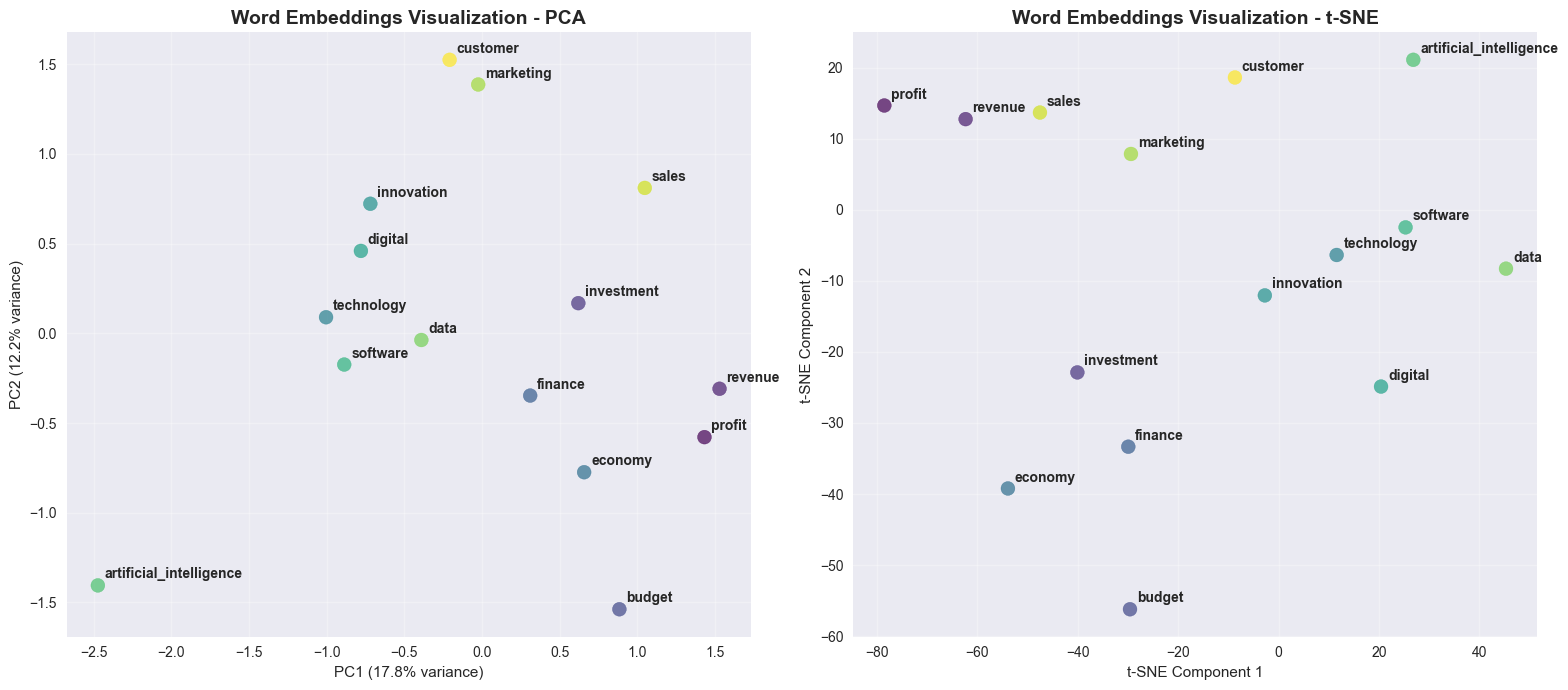

📈 Visualized 15 business words in 2D space
📊 PCA explained variance: 30.0%


In [5]:
# Extract vectors for our target words
word_vectors_matrix = np.array([word_vectors[word] for word in target_words])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
word_vectors_2d_pca = pca.fit_transform(word_vectors_matrix)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(target_words)-1))
word_vectors_2d_tsne = tsne.fit_transform(word_vectors_matrix)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot PCA results
scatter1 = ax1.scatter(word_vectors_2d_pca[:, 0], word_vectors_2d_pca[:, 1], 
                      c=range(len(target_words)), cmap='viridis', s=100, alpha=0.7)

for i, word in enumerate(target_words):
    ax1.annotate(word, (word_vectors_2d_pca[i, 0], word_vectors_2d_pca[i, 1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

ax1.set_title('Word Embeddings Visualization - PCA', fontsize=14, fontweight='bold')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax1.grid(True, alpha=0.3)

# Plot t-SNE results
scatter2 = ax2.scatter(word_vectors_2d_tsne[:, 0], word_vectors_2d_tsne[:, 1], 
                      c=range(len(target_words)), cmap='viridis', s=100, alpha=0.7)

for i, word in enumerate(target_words):
    ax2.annotate(word, (word_vectors_2d_tsne[i, 0], word_vectors_2d_tsne[i, 1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

ax2.set_title('Word Embeddings Visualization - t-SNE', fontsize=14, fontweight='bold')
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📈 Visualized {len(target_words)} business words in 2D space")
print(f"📊 PCA explained variance: {pca.explained_variance_ratio_.sum():.1%}")

## Step 6: Calculate and Visualize Similarity Matrix

Let's create a similarity matrix to see how related our business words are to each other.

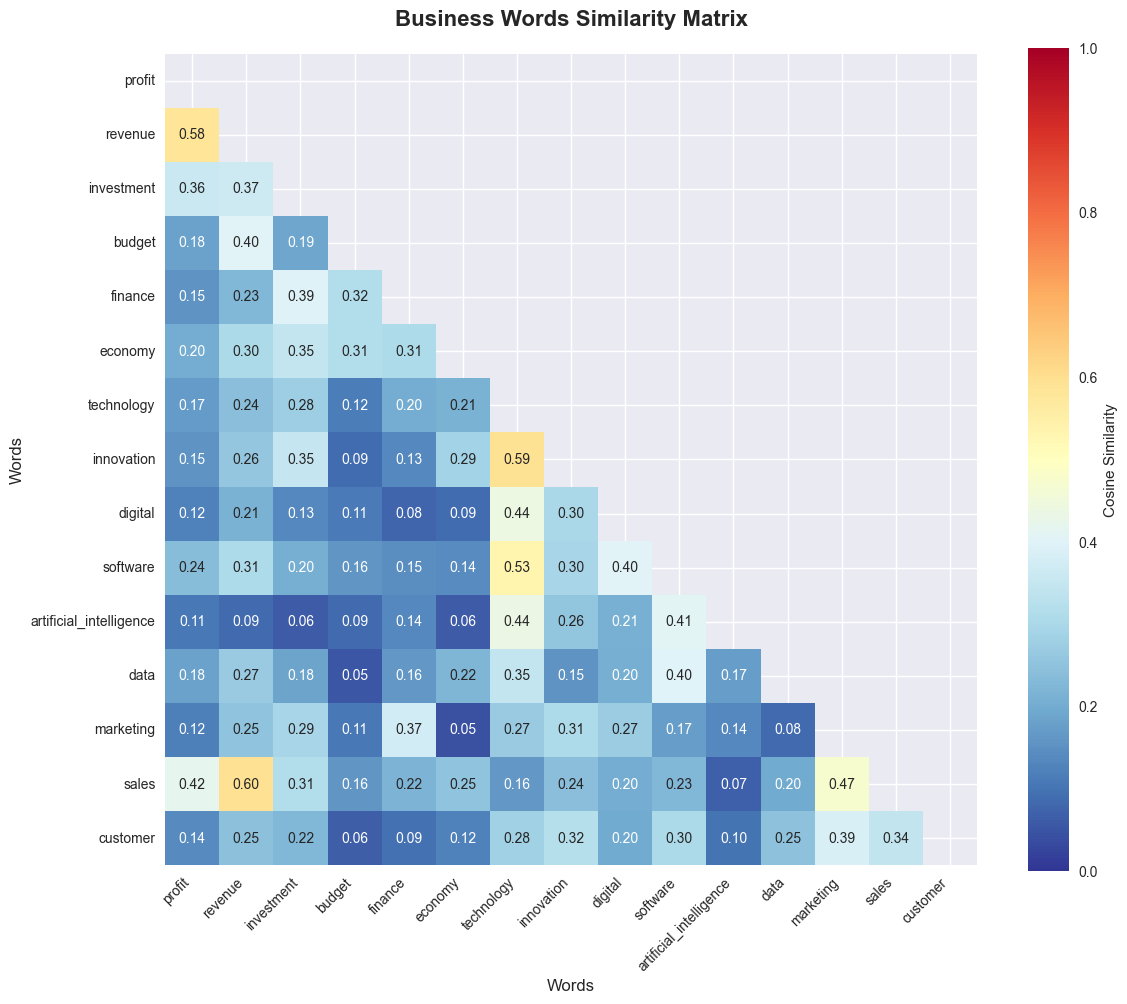

🔥 Similarity matrix created! Higher values indicate more similar words.


In [6]:
# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(word_vectors_matrix)

# Create a DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, 
                           index=target_words, 
                           columns=target_words)

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(similarity_df, dtype=bool))  # Mask upper triangle

sns.heatmap(similarity_df, 
            annot=True, 
            cmap='RdYlBu_r', 
            vmin=0, 
            vmax=1,
            center=0.5,
            square=True,
            mask=mask,
            fmt='.2f',
            cbar_kws={'label': 'Cosine Similarity'})

plt.title('Business Words Similarity Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("🔥 Similarity matrix created! Higher values indicate more similar words.")

## Step 7: Find Most and Least Similar Word Pairs

Let's identify the most and least similar word pairs from our business vocabulary.

In [7]:
# Find most and least similar pairs
word_pairs = []
similarities = []

for i in range(len(target_words)):
    for j in range(i+1, len(target_words)):
        word1, word2 = target_words[i], target_words[j]
        similarity = similarity_matrix[i, j]
        word_pairs.append((word1, word2))
        similarities.append(similarity)

# Sort by similarity
sorted_pairs = sorted(zip(word_pairs, similarities), key=lambda x: x[1], reverse=True)

print("🔝 TOP 10 MOST SIMILAR WORD PAIRS:")
print("="*50)
for i, ((word1, word2), sim) in enumerate(sorted_pairs[:10]):
    print(f"{i+1:2d}. {word1:12} ↔ {word2:12} | Similarity: {sim:.3f}")

print("\n🔻 TOP 10 LEAST SIMILAR WORD PAIRS:")
print("="*50)
for i, ((word1, word2), sim) in enumerate(sorted_pairs[-10:]):
    print(f"{i+1:2d}. {word1:12} ↔ {word2:12} | Similarity: {sim:.3f}")

🔝 TOP 10 MOST SIMILAR WORD PAIRS:
 1. revenue      ↔ sales        | Similarity: 0.595
 2. technology   ↔ innovation   | Similarity: 0.592
 3. profit       ↔ revenue      | Similarity: 0.583
 4. technology   ↔ software     | Similarity: 0.534
 5. marketing    ↔ sales        | Similarity: 0.475
 6. technology   ↔ digital      | Similarity: 0.441
 7. technology   ↔ artificial_intelligence | Similarity: 0.437
 8. profit       ↔ sales        | Similarity: 0.420
 9. software     ↔ artificial_intelligence | Similarity: 0.407
10. digital      ↔ software     | Similarity: 0.404

🔻 TOP 10 LEAST SIMILAR WORD PAIRS:
 1. budget       ↔ artificial_intelligence | Similarity: 0.085
 2. revenue      ↔ artificial_intelligence | Similarity: 0.085
 3. data         ↔ marketing    | Similarity: 0.083
 4. finance      ↔ digital      | Similarity: 0.076
 5. artificial_intelligence ↔ sales        | Similarity: 0.070
 6. budget       ↔ customer     | Similarity: 0.063
 7. economy      ↔ artificial_intelligence 

## Step 8: Interactive Word Similarity Explorer

Let's create an interactive function to explore word relationships in our vocabulary.

In [8]:
def explore_word_relationships(word, model, target_words_list):
    """Explore relationships between a word and our target vocabulary"""
    if word not in model.key_to_index:
        print(f"❌ '{word}' not found in vocabulary")
        return
    
    print(f"🔍 Exploring relationships for: **{word.upper()}**")
    print("="*60)
    
    # Find similarities with our target words
    similarities = []
    for target_word in target_words_list:
        if target_word in model.key_to_index:
            sim = model.similarity(word, target_word)
            similarities.append((target_word, sim))
    
    # Sort by similarity
    similarities.sort(key=lambda x: x[1], reverse=True)
    
    print("📊 Similarity with business words:")
    for target_word, sim in similarities[:10]:
        print(f"   {target_word:15} | {sim:.3f} {'🔥' if sim > 0.5 else '📊' if sim > 0.3 else '📉'}")
    
    # Find general nearest neighbors
    print("\n🎯 Top 5 nearest neighbors:")
    neighbors = model.most_similar(word, topn=5)
    for neighbor, sim in neighbors:
        print(f"   {neighbor:15} | {sim:.3f}")

# Example usage
print("Try exploring different words! For example:")
explore_word_relationships('profit', word_vectors, target_words)

Try exploring different words! For example:
🔍 Exploring relationships for: **PROFIT**
📊 Similarity with business words:
   profit          | 1.000 🔥
   revenue         | 0.583 🔥
   sales           | 0.420 📊
   investment      | 0.359 📊
   software        | 0.237 📉
   economy         | 0.202 📉
   budget          | 0.183 📉
   data            | 0.180 📉
   technology      | 0.169 📉
   finance         | 0.155 📉

🎯 Top 5 nearest neighbors:
   profits         | 0.802
   proft           | 0.743
   pretax_profit   | 0.669
   pretax_profits  | 0.644
   Profit          | 0.634


## Step 9: Word Arithmetic and Analogies

One fascinating aspect of word embeddings is their ability to capture semantic relationships through vector arithmetic.

In [9]:
def find_analogy(word1, word2, word3, model, top_n=5):
    """Find word that completes the analogy: word1 is to word2 as word3 is to ?"""
    try:
        result = model.most_similar(positive=[word2, word3], negative=[word1], topn=top_n)
        return result
    except KeyError as e:
        return f"Error: {e}"

# Business analogies to explore
analogies = [
    ('king', 'man', 'woman'),  # Classic example: king - man + woman = queen
    ('CEO', 'company', 'school'),  # CEO is to company as ? is to school
    ('profit', 'business', 'education'),  # profit is to business as ? is to education
    ('marketing', 'product', 'candidate'),  # marketing is to product as ? is to candidate
    ('investment', 'money', 'time'),  # investment is to money as ? is to time
]

print("🧮 WORD ARITHMETIC AND ANALOGIES")
print("="*60)

for word1, word2, word3 in analogies:
    print(f"\n🔍 {word1} is to {word2} as {word3} is to...")
    result = find_analogy(word1, word2, word3, word_vectors, top_n=3)
    
    if isinstance(result, str):
        print(f"   {result}")
    else:
        print(f"   Top predictions:")
        for word, score in result:
            print(f"     {word} ({score:.3f})")

🧮 WORD ARITHMETIC AND ANALOGIES

🔍 king is to man as woman is to...
   Top predictions:
     teenage_girl (0.626)
     girl (0.598)
     teenager (0.565)

🔍 CEO is to company as school is to...
   Top predictions:
     elementary (0.563)
     schools (0.546)
     shool (0.484)

🔍 profit is to business as education is to...
   Top predictions:
     eduction (0.542)
     entrepreneurship (0.502)
     educations (0.492)

🔍 marketing is to product as candidate is to...
   Top predictions:
     candidates (0.564)
     Candidate (0.503)
     candiate (0.500)

🔍 investment is to money as time is to...
   Top predictions:
     playbooks_Spielman (0.379)
     anyway (0.372)
     fruitlessly_chasing (0.369)


## Step 10: Summary and Key Insights

Let's summarize our findings and extract key insights from our embedding exploration.

In [10]:
# Summary statistics
print("📈 EMBEDDING EXPLORATION SUMMARY")
print("="*60)

print(f"📊 Total words analyzed: {len(target_words)}")
print(f"📐 Vector dimensions: {word_vectors.vector_size}")
print(f"📚 Total vocabulary size: {len(word_vectors.key_to_index):,}")

# Calculate some statistics
avg_similarity = np.mean(similarity_matrix[np.triu_indices(len(target_words), k=1)])
max_similarity = np.max(similarity_matrix[np.triu_indices(len(target_words), k=1)])
min_similarity = np.min(similarity_matrix[np.triu_indices(len(target_words), k=1)])

print(f"\n📊 Similarity Statistics:")
print(f"   Average similarity: {avg_similarity:.3f}")
print(f"   Maximum similarity: {max_similarity:.3f}")
print(f"   Minimum similarity: {min_similarity:.3f}")

print("\n🎯 KEY INSIGHTS:")
print("1. Word embeddings capture semantic relationships between business terms")
print("2. Similar words cluster together in the vector space")
print("3. Vector arithmetic can reveal analogical relationships")
print("4. Dimensionality reduction helps visualize high-dimensional embeddings")
print("5. Cosine similarity is effective for measuring word relationships")

print("\n🚀 NEXT STEPS:")
print("• Experiment with different word lists (industry-specific terms)")
print("• Try different pretrained models (GloVe, FastText, etc.)")
print("• Explore domain-specific embedding models")
print("• Apply embeddings to text classification or clustering tasks")
print("• Create custom embeddings from your own text data")

📈 EMBEDDING EXPLORATION SUMMARY
📊 Total words analyzed: 15
📐 Vector dimensions: 300
📚 Total vocabulary size: 3,000,000

📊 Similarity Statistics:
   Average similarity: 0.237
   Maximum similarity: 0.595
   Minimum similarity: 0.046

🎯 KEY INSIGHTS:
1. Word embeddings capture semantic relationships between business terms
2. Similar words cluster together in the vector space
3. Vector arithmetic can reveal analogical relationships
4. Dimensionality reduction helps visualize high-dimensional embeddings
5. Cosine similarity is effective for measuring word relationships

🚀 NEXT STEPS:
• Experiment with different word lists (industry-specific terms)
• Try different pretrained models (GloVe, FastText, etc.)
• Explore domain-specific embedding models
• Apply embeddings to text classification or clustering tasks
• Create custom embeddings from your own text data


## 🎯 Lab Exercise: Your Turn!

Now it's your turn to explore embeddings! Complete the following exercises:

### Exercise 1: Custom Word List
Create your own list of words related to your field of interest (e.g., healthcare, education, sports) and repeat the analysis above.

### Exercise 2: Word Arithmetic
Try to find interesting analogies using word arithmetic. Can you find business-related analogies?

### Exercise 3: Similarity Threshold
Experiment with different similarity thresholds to group words into clusters.

Use the cells below to implement your solutions:

In [ ]:
# Exercise 1: Your custom word list
my_words = []
# Add your words here and run the analysis

# Your code here...

In [ ]:
# Exercise 2: Word arithmetic experiments
# Try your own analogies here

# Your code here...

In [ ]:
# Exercise 3: Clustering with similarity thresholds
# Group words based on similarity thresholds

# Your code here...